# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [6]:
if os.name=='nt':
    !pip install wget
    import wget

You should consider upgrading via the 'c:\fypimp\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-37: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-37: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-37: module MAY be using inspect.stack
error: Setup script exited with error: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/



running build_py
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\build_imagenet_data.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\cifar10.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\dataset_factory.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\dataset_utils.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_cifar10.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_flowers.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_mnist.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_visualwakewords.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\download_and_convert_visualwakewords_lib.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\flowers.py -> build\bdist.win-amd64\egg\dat

byte-compiling build\bdist.win-amd64\egg\preprocessing\lenet_preprocessing.py to lenet_preprocessing.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\preprocessing\preprocessing_factory.py to preprocessing_factory.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\preprocessing\vgg_preprocessing.py to vgg_preprocessing.cpython-37.pyc
byte-compiling build\bdist.win-amd64\egg\preprocessing\__init__.py to __init__.cpython-37.pyc
creating build\bdist.win-amd64\egg\EGG-INFO
copying object_detection.egg-info\PKG-INFO -> build\bdist.win-amd64\egg\EGG-INFO
copying object_detection.egg-info\SOURCES.txt -> build\bdist.win-amd64\egg\EGG-INFO
copying object_detection.egg-info\dependency_links.txt -> build\bdist.win-amd64\egg\EGG-INFO
copying object_detection.egg-info\requires.txt -> build\bdist.win-amd64\egg\EGG-INFO
copying object_detection.egg-info\top_level.txt -> build\bdist.win-amd64\egg\EGG-INFO
creating 'dist\object_detection-0.1-py3.7.egg' and adding 'build\bdist.win-amd64\egg'

You should consider upgrading via the 'c:\fypimp\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-04-04 20:18:20.698293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-04 20:18:20.699281: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-04 20:18:32.710500: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-04-04 20:18:32.711262: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-04 20:18:32.729449: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-NHKT6IFA
2022-04-04 20:18:32.729930: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-NHKT6IFA
Running tests under Python 3.7.9: C:\FYPimp\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF

I0404 20:19:19.514397  7696 efficientnet_model.py:147] round_filter input=32 output=64
I0404 20:19:19.544247  7696 efficientnet_model.py:147] round_filter input=32 output=64
I0404 20:19:19.544247  7696 efficientnet_model.py:147] round_filter input=16 output=32
I0404 20:19:20.044827  7696 efficientnet_model.py:147] round_filter input=16 output=32
I0404 20:19:20.044827  7696 efficientnet_model.py:147] round_filter input=24 output=48
I0404 20:19:21.084871  7696 efficientnet_model.py:147] round_filter input=24 output=48
I0404 20:19:21.084871  7696 efficientnet_model.py:147] round_filter input=40 output=80
I0404 20:19:22.120790  7696 efficientnet_model.py:147] round_filter input=40 output=80
I0404 20:19:22.120790  7696 efficientnet_model.py:147] round_filter input=80 output=160
I0404 20:19:23.774484  7696 efficientnet_model.py:147] round_filter input=80 output=160
I0404 20:19:23.774484  7696 efficientnet_model.py:147] round_filter input=112 output=224
I0404 20:19:25.704298  7696 efficientne

In [10]:
!pip install pyyaml

You should consider upgrading via the 'c:\fypimp\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.20.0
Uninstalling protobuf-3.20.0:
  Successfully uninstalled protobuf-3.20.0
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0


  Using cached protobuf-3.20.0-cp37-cp37m-win_amd64.whl (905 kB)
  Using cached matplotlib-3.2.0-cp37-cp37m-win_amd64.whl (9.2 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.6.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.6.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.6.0 requires oauth2client, which is not installed.
tf-models-official 2.6.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.6.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.6.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.6.0 requires pycocotools, which is not installed.
tf-models-officia

In [12]:
import object_detection

In [13]:
!pip list

You should consider upgrading via the 'c:\fypimp\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


Package                 Version   Location
----------------------- --------- ----------------------------------------------------
absl-py                 0.13.0
argcomplete             1.12.3
astunparse              1.6.3
backcall                0.2.0
cached-property         1.5.2
cachetools              4.2.2
certifi                 2021.5.30
charset-normalizer      2.0.4
clang                   5.0
colorama                0.4.4
cycler                  0.10.0
Cython                  0.29.24
debugpy                 1.4.3
decorator               5.1.0
entrypoints             0.3
flatbuffers             1.12
gast                    0.4.0
gin                     0.1.6
gin-config              0.1.1
google-auth             1.35.0
google-auth-oauthlib    0.4.6
google-pasta            0.2.0
grpcio                  1.40.0
h5py                    3.1.0
idna                    3.2
importlib-metadata      4.8.1
ipykernel               6.4.1
ipython                 7.27.0
ipython-genutils        0

In [14]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  9% [......                                                                  ]  1859584 / 20515344

 17% [............                                                            ]  3538944 / 20515344

 22% [...............                                                         ]  4513792 / 20515344

 26% [...................                                                     ]  5488640 / 20515344

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [15]:
labels = [{'name':'Dry Waste-Metal Can', 'id':1}, {'name':'Dry Waste-Paper', 'id':2}, {'name':'Dry Waste-Paper Ball', 'id':3}, {'name':'drywaste-Bottle', 'id':4}, {'name':'drywaste-cardboard', 'id':5}, {'name':'drywaste-CrushedBottle', 'id':6}, {'name':'Wet Waste-Bread Slice', 'id':7}, {'name':'wetwaste-Apple', 'id':8}, {'name':'wetwaste-banana', 'id':9}, {'name':'wetwaste-EggShell', 'id':10}, {'name':'wetwaste-HalfApple', 'id':11}, {'name':'wetwaste-potato', 'id':12}, {'name':'Dry Waste-Wrapper', 'id':13}, {'name':'Dry Waste-Tetrapack', 'id':14}]
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [16]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

x Tensorflow/workspace/images/train/
x Tensorflow/workspace/images/train/00.jpeg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/00.xml
x Tensorflow/workspace/images/train/00a.jpeg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/00a.xml
x Tensorflow/workspace/images/train/1 Litre Tetra Pack Ghee....jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/1 Litre Tetra Pack Ghee....xml
x Tensorflow/workspace/images/train/1.jpeg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/1.xml
x Tensorflow/workspace/images/train/10 Unusual Ways to Use Banana Peels.jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/10 Unusual Ways to Use Banana Peels.xml
x Tensorflow/workspace/images/train/13 College Ruled riting paper Templates....jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/13 College Ruled riting paper Templates....xml
x Tensorflow/workspace

x Tensorflow/workspace/images/train/Banana Peel (item) _ Smashpedia _ Fandom.png: Can't unlink already-existing object
x Tensorflow/workspace/images/train/Banana Peel (item) _ Smashpedia _ Fandom.xml
x Tensorflow/workspace/images/train/Banana Peel Bacon....jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/Banana Peel Bacon....xml
x Tensorflow/workspace/images/train/Banana Peel Benefits_ Hair_ Skin....jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/Banana Peel Benefits_ Hair_ Skin....xml
x Tensorflow/workspace/images/train/Banana Peel Stock Photo - Download....jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/Banana Peel Stock Photo - Download....xml
x Tensorflow/workspace/images/train/banana peels....jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/banana peels....xml
x Tensorflow/workspace/images/train/Bananadine - Wikipedia.jpg: Can't unlink already-existing object
x Ten

x Tensorflow/workspace/images/train/Crushed Plastic Bottle_ On White... (1).xml
x Tensorflow/workspace/images/train/Crushed Plastic Bottle_ On White... (2).jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/Crushed Plastic Bottle_ On White... (2).xml
x Tensorflow/workspace/images/train/Crushed Plastic Water Bottle Images....jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/Crushed Plastic Water Bottle Images....xml
x Tensorflow/workspace/images/train/Crushed Plastics Bottle For Trash Stock....jpg: Can't unlink already-existing object
x Tensorflow/workspace/images/train/Crushed Plastics Bottle For Trash Stock....xml
x Tensorflow/workspace/images/train/Crushed Water Bottle Png_ Transparent....png: Can't unlink already-existing object
x Tensorflow/workspace/images/train/Crushed Water Bottle Png_ Transparent....xml
x Tensorflow/workspace/images/train/D.I.Y. Potato Barrel - Age Old.jpg: Can't unlink already-existing object
x Tensorflow/

In [17]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [18]:
!pip install pytz

You should consider upgrading via the 'c:\fypimp\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Traceback (most recent call last):
  File "Tensorflow\scripts\generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "C:\FYPimp\TFODCourse\tfod\lib\site-packages\tensorflow\python\platform\app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "C:\FYPimp\TFODCourse\tfod\lib\site-packages\absl\app.py", line 312, in run
    _run_main(main, args)
  File "C:\FYPimp\TFODCourse\tfod\lib\site-packages\absl\app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "Tensorflow\scripts\generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "Tensorflow\scripts\generate_tfrecord.py", line 132, in create_tf_example
    classes.append(class_text_to_int(row['class']))
  File "Tensorflow\scripts\generate_tfrecord.py", line 101, in class_text_to_int
    return label_map_dict[row_label]
KeyError: 'wetwaste-R'


Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [20]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [21]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [22]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [23]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [24]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [25]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [26]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [22]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [23]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [24]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

# 7. Evaluate the Model

In [28]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

NameError: name 'TRAINING_SCRIPT' is not defined

In [30]:
print(command)

NameError: name 'command' is not defined

In [30]:
!{command}

'{command}' is not recognized as an internal or external command,
operable program or batch file.


# 8. Load Train Model From Checkpoint

In [27]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [28]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-21')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [29]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [35]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'broken shell isolated Vector Image.jpg')

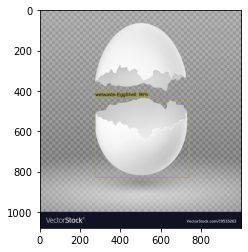

In [36]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)
image_name=''

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
#print(detections['detection_classes'].astype(np.int64))

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)
            

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [33]:
!pip uninstall opencv-python-headless -y


In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
  
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                    for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [30]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [31]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [32]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [33]:
!{command}

2022-04-04 20:22:16.420377: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-04 20:22:16.420471: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-04 20:22:20.571543: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-04-04 20:22:20.571603: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-04 20:22:20.586158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-NHKT6IFA
2022-04-04 20:22:20.586687: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-NHKT6IFA
2022-04-04 20:22:20.603246: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is

# 11. Conversion to TFJS

In [39]:
!pip install tensorflowjs

You should consider upgrading via the 'c:\fypimp\tfodcourse\tfod\scripts\python.exe -m pip install --upgrade pip' command.


In [40]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [41]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [42]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2022-04-02 15:24:47.151751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-02 15:24:47.151809: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-02 15:24:51.727199: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-04-02 15:24:51.727244: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-02 15:24:51.735121: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-NHKT6IFA
2022-04-02 15:24:51.735353: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-NHKT6IFA
2022-04-02 15:24:51.735635: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [34]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [35]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [37]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [38]:
!{command}

2022-04-04 20:24:52.000522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-04 20:24:52.000645: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-04 20:24:55.580027: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-04-04 20:24:55.580067: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-04 20:24:55.587005: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-NHKT6IFA
2022-04-04 20:24:55.587215: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-NHKT6IFA
2022-04-04 20:24:55.600049: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is

In [39]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [40]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [41]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [42]:
!{command}

2022-04-04 20:26:34.909304: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-04 20:26:34.909343: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-04 20:26:37.219608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-04-04 20:26:37.219673: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-04 20:26:37.233141: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-NHKT6IFA
2022-04-04 20:26:37.233453: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-NHKT6IFA
2022-04-04 20:26:37.791863: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')